# Cross Validation

## K-Fold Cross-Validation
Split the training data into K subsets of equal  size. Iterate over the folds where each fold serves as the test set 1 time, and the training set k-1 times. Average testing performance across k test is used as the metric. 

Reduces variance of the testing process by averaging scores. More reliable out of sample performance. Can be used for parameter tuning, model selection, and feature selection. Computationally expensive and can lead to overfitting if too many things are compared at once.


In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

### cross_val_score
Simple K fold Cross Validation

In [3]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y,cv = 10, scoring = 'accuracy')
print(scores)
print(scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667


### GridSearchCV
Define a grid of parameters that will be searched usin k fold cross val. Input a dictionary with chosen parameters to iterate over, performs k fold on each potential parameter.

sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise’, return_train_score=’warn’)

estimator - the classifier/regressor that you want to test hyperparameters on.

param_grid - a dictionary whose keys are the name of the hyperparameters and values are a list of potential parameter values.

Scoring = method to score.

fit_params - parameters to pass to the fit method

n_jobs - set to 1 by default to test each parameter once, parameters can be searched in parallel with "-1"

cv  - cross validation strattegy, by default set to 3 fold cv. input an integer for n fold validation

return_train_score - "true" saves the results of the cross vallidation



#### Internal Values and Methods
    cv_results_ - a dictionary of masked numpya arrays that can be imported into a pandas dataframe.

    best_estimator_ - estimator that was chosen by the search

    best_score_ - best mean cross validated score

    best_params_ 


Once fit is called, the object becomes the best scoring classifier regressor

In [4]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [5]:
grid_input = {'n_neighbors':list(range(1,31))}
grid = GridSearchCV(knn, grid_input, cv = 10, scoring = 'accuracy', return_train_score = True)
grid.fit(X,y)
res = pd.DataFrame(grid.cv_results_)
res.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001652,0.002003,0.960000,1.000000,1,{'n_neighbors': 1},24,1.0,1.000000,0.933333,...,1.000000,1.000000,1.0,1.000000,1.0,1.000000,0.000635,4.475739e-04,0.053333,0.000000
1,0.001401,0.002001,0.953333,0.978519,2,{'n_neighbors': 2},27,1.0,0.970370,0.933333,...,0.933333,0.977778,1.0,0.977778,1.0,0.977778,0.000491,8.730809e-07,0.052068,0.005185
2,0.001402,0.001801,0.966667,0.960741,3,{'n_neighbors': 3},12,1.0,0.955556,0.933333,...,1.000000,0.955556,1.0,0.955556,1.0,0.955556,0.000201,2.452137e-04,0.044721,0.007444
3,0.001152,0.001801,0.966667,0.963704,4,{'n_neighbors': 4},12,1.0,0.955556,0.933333,...,1.000000,0.962963,1.0,0.955556,1.0,0.970370,0.000229,2.452045e-04,0.044721,0.006988
4,0.000951,0.001501,0.966667,0.968889,5,{'n_neighbors': 5},12,1.0,0.962963,0.933333,...,1.000000,0.962963,1.0,0.962963,1.0,0.970370,0.000150,2.198111e-07,0.044721,0.007258


Text(0.5,1,'KNN Performance on Iris DataSet')

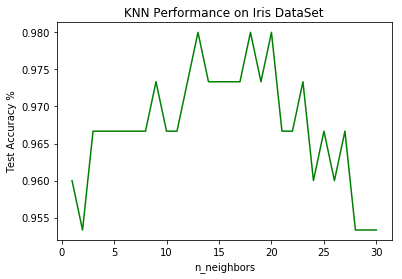

In [6]:
plt.plot( res['param_n_neighbors'], res['mean_test_score'], color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Test Accuracy %')
plt.title('KNN Performance on Iris DataSet')


Text(0.5,1,'KNN Performance on Iris DataSet')

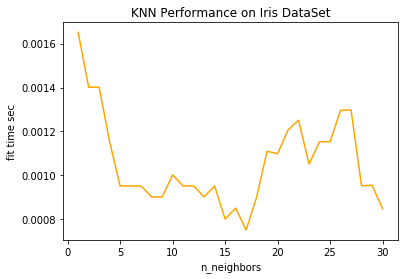

In [7]:
plt.plot( res['param_n_neighbors'], res['mean_fit_time'], color = 'orange')
plt.xlabel('n_neighbors')
plt.ylabel('fit time sec')
plt.title('KNN Performance on Iris DataSet')



In [8]:
print(grid.best_score_, '\n',
      grid.best_params_, '\n',
      grid.best_estimator_)

0.98 
 {'n_neighbors': 13} 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


### Searching Multiple Parameters

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

#### Make your parameter list.


In [10]:
splitter = ['best','random']
max_depth = list(range(1,6))
grid_input = dict(splitter = splitter, max_depth = max_depth)
grid_input

{'max_depth': [1, 2, 3, 4, 5], 'splitter': ['best', 'random']}

In [11]:
grid2 = GridSearchCV(tree, grid_input, scoring = 'accuracy', cv = 5, return_train_score = True)
grid2.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'splitter': ['best', 'random'], 'max_depth': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [12]:
res2 = pd.DataFrame(grid2.cv_results_)
res2.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_splitter,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001402,0.001001,0.666667,0.666667,1,best,"{'max_depth': 1, 'splitter': 'best'}",9,0.666667,0.666667,...,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.000492,0.000001,0.000000,0.000000
1,0.001015,0.000805,0.660000,0.651667,1,random,"{'max_depth': 1, 'splitter': 'random'}",10,0.666667,0.666667,...,0.633333,0.633333,0.666667,0.666667,0.666667,0.625000,0.000013,0.000238,0.013333,0.018559
2,0.001010,0.000902,0.933333,0.961667,2,best,"{'max_depth': 2, 'splitter': 'best'}",7,0.933333,0.958333,...,0.900000,0.975000,0.866667,0.966667,1.000000,0.950000,0.000013,0.000199,0.047140,0.008498
3,0.000805,0.000400,0.780000,0.803333,2,random,"{'max_depth': 2, 'splitter': 'random'}",8,0.800000,0.866667,...,0.766667,0.833333,0.933333,0.966667,0.733333,0.683333,0.000403,0.000490,0.088443,0.113725
4,0.001201,0.000801,0.973333,0.973333,3,best,"{'max_depth': 3, 'splitter': 'best'}",1,0.966667,0.958333,...,0.933333,0.991667,1.000000,0.975000,1.000000,0.966667,0.000400,0.000400,0.024944,0.011055


param_splitter
best      AxesSubplot(0.125,0.125;0.775x0.755)
random    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

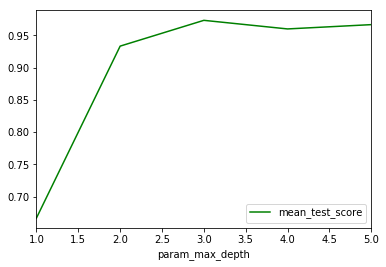

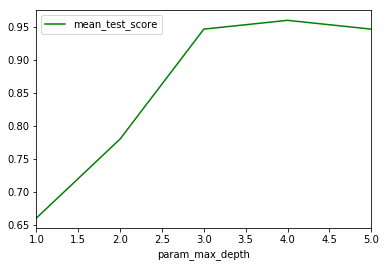

In [13]:
plotinput = res2.groupby('param_splitter')
plotinput.plot( x = 'param_max_depth', y = 'mean_test_score',color='green' )

In [14]:
print(grid2.best_score_, '\n',
      grid2.best_params_, '\n',
      grid2.best_estimator_)

0.973333333333 
 {'max_depth': 3, 'splitter': 'best'} 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


### RandomizedSearchCV

Minimizes computational expense by searching a subset of the parameters

In [15]:
from sklearn.model_selection import RandomizedSearchCV
#... same method as before

## Confusion Matrix

True Positives (TP): we correctly predicted that they do have diabetes
True Negatives (TN): we correctly predicted that they don't have diabetes
False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")


Left: Actual

Top: Predicted

In [16]:
from sklearn.metrics import confusion_matrix
pred = grid2.predict(X)
confusion_matrix(y, pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [19]:
import sklearn.metrics
sklearn.metrics.accuracy_score(y, pred)

0.97333333333333338